#### Import and Load Dependencies/Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM

%matplotlib inline

#### Importing the data set into the data frame variable df, and fefining the columns for the data set.

In [2]:
df = pd.read_csv('C:/Users/Adhish/Downloads/s171HbTsJmNQ', index_col=None)

In [3]:
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", 
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [5]:
df.columns = columns

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df = df[df['service'] == 'http']

df = df.drop('service', axis=1)

columns.remove('service')

In [8]:
df.shape

(623090, 41)

#### Filtering out the anomalies and the normal data points to construct a new data set that is a mixture of the two. We are making two data frames that consist of normal entries and an equal mix of anomalies & normal data entries.

In [9]:
novelties = df[df['label'] != 'normal.'] 

novelties_normal = df[150000:154045]

In [10]:
novelties = pd.concat([novelties, novelties_normal])

normal = df[df['label'] == 'normal.']

#### The first half of the data frame “novelties” consists of anomalies, while the latter half consists of normal data entries. 

In [11]:
novelties.shape

(8090, 41)

In [12]:
normal.shape

(619045, 41)

#### Now we move on to encoding all the categorical values in the data frames. 

In [13]:
for col in normal.columns:
    if normal[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(normal[col])
        normal[col] = encoded.transform(normal[col])

<ipython-input-13-fa1f935f73fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal[col] = encoded.transform(normal[col])


In [14]:
for col in novelties.columns:
    if novelties[col].dtype == 'object':
        encoded2 = LabelEncoder()
        encoded2.fit(novelties[col])
        novelties[col] = encoded2.transform(novelties[col])

#### Now set up your training, testing, and validation sets, after schuffling the data.

In [15]:
for f in range(0, 3):
    
    normal = normal.iloc[np.random.permutation(len(normal))]

In [16]:
df2 = pd.concat([normal[:100000], normal[200000:250000]])

df_validate = normal[100000:150000]

x_train, x_test = train_test_split(df2, test_size=0.2, random_state=42)

x_val = df_validate

In [17]:
print("Shapes:\nx_train:{}\n".format(x_train.shape))

print("x_test:{}\n".format(x_test.shape))

print("x_val:{}\n".format(x_val.shape))

Shapes:
x_train:(120000, 41)

x_test:(30000, 41)

x_val:(50000, 41)



## Build the Model

### We are only using a subset of the entire data set to train the model, because the larger the training data, the longer it takes for the OC-SVM to train.

##### By default, the kernel is set to ‘rbf’, meaning radial basis function. It is similar to the circular decision boundary, and you use it here because we want to define a circular boundary around a set of regions that contain normal data. Any points that fall outside of the region are to be considered anomalies.



##### Gamma tells the model how much you want to consider points further from the hyperplane. Since, we want to emphasize that the points be farther away, it is set as a pretty small value.


##### The parameter, nu, specifies how much of the training set contains outliers. We set this to 0.1, similar to the isolation forest model. This acts similar to the regularization parameter that we saw earlier, since it tells the model approximately how many data points we expect the model to misclassify.


In [18]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.00005,  nu=0.1)

In [19]:
ocsvm.fit(x_train)

OneClassSVM(gamma=5e-05, nu=0.1)

## Model Evaluation

##### One thing to note is that you can’t get the values for an AUC curve for x_test and x_validation since they comprise entirely of normal data values. You can’t get values for true negative or for false positive since there are no anomalies in the data set to classify falsely as normal or correctly as anomalies.


##### We can measure the accuracy of the model on the test and validation sets. Even though accuracy is not the best metric to go by, it can still give you a good indicator of the model’s performance.

### Note: Accuracy in this case is a measure of the percentage of data points in the predictions that are normal data points. Remember, you assumed that around 10% of the data points in the data set are anomalies, so the most optimal “accuracy” to obtain is 90%.



In [20]:
preds= ocsvm.predict(x_test)

score = 0

for f in range(0, x_test.shape[0]):
    if preds[f] == 1:
        score= score + 1
        
accuracy = score / x_test.shape[0]

print('Accuracy: {:.2%}'. format(accuracy))

Accuracy: 89.28%


##### The accuracy is about 89.73%, which is pretty good considering that you assumed 10% of the data would misclassify. Let’s run the code on x_validation this time.

In [21]:
preds= ocsvm.predict(x_val)

score = 0

for f in range(0, x_val.shape[0]):
    if preds[f] == 1:
        score= score + 1
        
accuracy = score / x_val.shape[0]

print('Accuracy: {:.2%}'. format(accuracy))

Accuracy: 89.25%


##### This time the accuracy was even better at around 89.75%. Now to test on the novelties data set. This time, we can find the AUC score because there is a 50-50 split between anomalies and normal data. The other two data sets, x_test and x_validation, only had normal data, but this time it is possible for the model to classify false positives and true negatives.

In [22]:
from sklearn.metrics import roc_auc_score

preds = ocsvm.predict(novelties)

matches = novelties['label'] == 4

auc = roc_auc_score(preds, matches)

print('AUC: {:.2%}'.format(auc))

AUC: 95.89%


### Let’s look at the distribution of predictions.

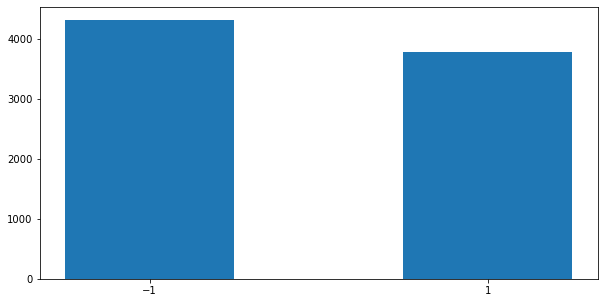

In [23]:
plt.figure(figsize = (10, 5))

plt.hist(preds, bins=[-1.5, -0.5] + [0.5, 1.5], align='mid' )

plt.xticks([-1, 1])

plt.show()

### As you can see in Figure above, the model ended up predicting more anomalies than normal data points, but from what the AUC tells us, it managed to classify most of the data entries correctly.